In [1]:
import numpy as np
import cv2
import time
from sklearn.preprocessing import StandardScaler

from detection.extract_features import extract_features, test_train_data
from detection.config import DetectionConfig

In [2]:
config = DetectionConfig(classifier_name="LinearSVC")
X_scaler = StandardScaler()
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = test_train_data(X_scaler, rand_state, config=config)

/Users/kyledorman/Documents/carnd/vehicleDetection/data/full/vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/full/non-vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/full/vehicles already unzipped.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/full/non-vehicles already unzipped.
Found 8792 vehicle images and 8968 non-vehicle images in data folder.
extracting features from 8792 images
done extracting features from 8792 images
extracting features from 8968 images
done extracting features from 8968 images
Took 69.87 seconds to extract 17760 features.


In [3]:
from detection.extract_features import train_classifier

train_classifier(X_train, X_test, y_train, y_test, X_scaler, rand_state, config=config)

Training classifier
5.47 seconds to train LinearSVC ...
Test Accuracy of LinearSVC = 0.9901
Train Accuracy of LinearSVC = 1.0
0.08 seconds to predict 3552 test labels and 14208 train labels with LinearSVC
Saving classifier.
Done saving classifier.
Saving scaler.
Done saving scaler.


Unpickling file classifier_LinearSVC_full_125_1.0_RGB_YCrCb_32_8_16_2_True.p.
Unpickling file scaler_full_125_1.0_RGB_YCrCb_32_8_16_2_True.p.
[ 0.99039005  0.98990466]
[ 0.98983051  0.99046016]
[ 0.9901102   0.99018233]


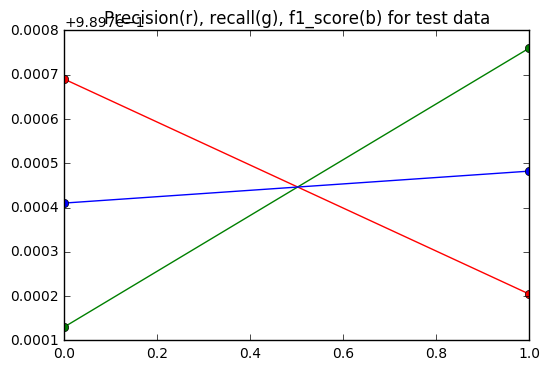

[ 1.  1.]
[ 1.  1.]
[ 1.  1.]


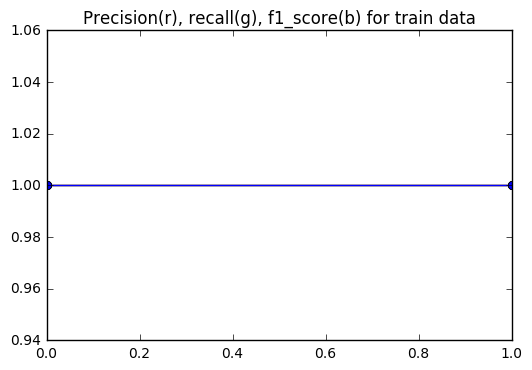

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from detection.data import open_pickle_file

clf = open_pickle_file(config.classifier_file())
scaler = open_pickle_file(config.scaler_file())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

def precision(y_data, y_pred, title):
  precision, recall, f1_score, label_count = precision_recall_fscore_support(y_data, y_pred)
  
  print(precision)
  print(recall)
  print(f1_score)
  
  plt.title("Precision(r), recall(g), f1_score(b) for " + title)
  plt.plot(range(len(precision)), precision, marker='o', color='r')
  plt.plot(range(len(precision)), recall, marker='o', color='g')
  plt.plot(range(len(precision)), f1_score, marker='o', color='b')
  plt.show()
  
precision(y_test, y_test_pred, "test data")
precision(y_train, y_train_pred, "train data")

In [5]:
config = DetectionConfig(classifier_name="LinearSVC", size="small")
X_train_small, X_test_small, y_train_small, y_test_small = test_train_data(X_scaler, rand_state, config=config)

for i in range(10, 20):
  real = y_test_small[i]
  pred = clf.predict(np.array([X_test_small[i]]))
  print("prdicted", int(pred[0]), "and is actually", int(real))


/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicles_smallset already unzipped.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicles_smallset already unzipped.
Found 1196 vehicle images and 1125 non-vehicle images in data folder.
extracting features from 1196 images
done extracting features from 1196 images
extracting features from 1125 images
done extracting features from 1125 images
Took 8.32 seconds to extract 2321 features.
prdicted 0 and is actually 0
prdicted 1 and is actually 1
prdicted 1 and is actually 1
prdicted 0 and is actually 1
prdicted 0 and is actually 0
prdicted 0 and is actually 0
prdicted 0 and is actually 0
prdicted 0 and is actually 0
prdicted 1 and is actually 1
prdicted 0 and is actually 0


In [6]:
clf.score(X_train_small, y_train_small)

0.98922413793103448